In [1]:
#importing necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [3]:
#!pip install opendatasets

In [4]:
import opendatasets as od

In [5]:
#importing dataset

od.download(r"https://www.kaggle.com/datasets/whenamancodes/tesla-inc-stock-market-analysis-founding-years?select=TeslaInc.+%28+TSLA+%29.csv")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: surisettideepika
Your Kaggle Key: ··········


100%|██████████| 61.6k/61.6k [00:00<00:00, 13.3MB/s]

In [7]:
df  = pd.read_csv("/content/tesla-inc-stock-market-analysis-founding-years/TeslaInc.csv")

In [ ]:
df.shape

(3077, 7)

In [ ]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [ ]:
df.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [ ]:
#checking if there are duplicates in the data

df.duplicated().sum()

0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3077 entries, 0 to 3076
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3077 non-null   object 
 1   Open       3077 non-null   float64
 2   High       3077 non-null   float64
 3   Low        3077 non-null   float64
 4   Close      3077 non-null   float64
 5   Adj Close  3077 non-null   float64
 6   Volume     3077 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 168.4+ KB


In [8]:
df["Date"]=pd.to_datetime(df["Date"])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3077 entries, 0 to 3076
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       3077 non-null   datetime64[ns]
 1   Open       3077 non-null   float64       
 2   High       3077 non-null   float64       
 3   Low        3077 non-null   float64       
 4   Close      3077 non-null   float64       
 5   Adj Close  3077 non-null   float64       
 6   Volume     3077 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 168.4 KB


In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3077.000000,3077.000000,3077.000000,3077.000000,3077.000000,3.077000e+03
mean,55.502174,56.748047,54.161176,55.495537,55.495537,9.340392e+07
std,93.913081,96.085026,91.517219,93.851345,93.851345,8.235816e+07
min,1.076000,1.108667,0.998667,1.053333,1.053333,1.777500e+06
25%,8.192667,8.354667,7.970667,8.113333,8.113333,4.144350e+07
50%,15.983333,16.242001,15.687333,16.000668,16.000668,7.541550e+07
75%,23.586666,23.916668,23.229334,23.523333,23.523333,1.173030e+08
max,411.470001,414.496674,405.666656,409.970001,409.970001,9.140820e+08


In [9]:
#to know if there are any outliers in our data

num_col = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
fqr=df[num_col].quantile(0.25)
tqr=df[num_col].quantile(0.75)

IQR=tqr-fqr
outlier=((df[num_col] < (fqr-1.5*IQR)) | (df[num_col] > (tqr+1.5*IQR)))
print(outlier.sum())

Open         633
High         636
Low          629
Close        635
Adj Close    635
Volume       202
dtype: int64


we can see that there are lot of outliers in our data.So we need to focus on them otherwise we will miss the true insights.

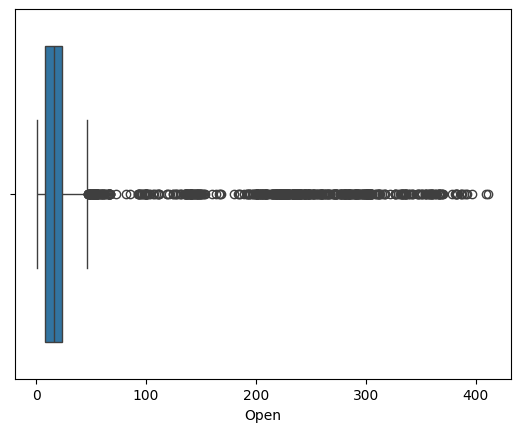

In [ ]:
#we can also check for outliers through box plot

sns.boxplot(x=df.Open)
plt.show()

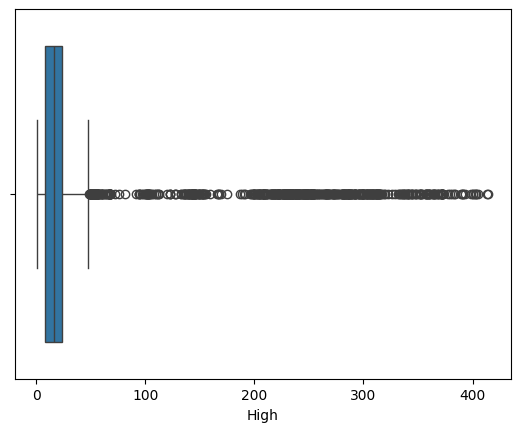

In [ ]:
sns.boxplot(x=df.High)
plt.show()

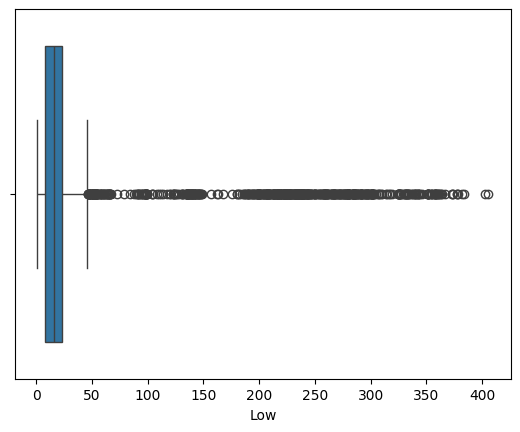

In [ ]:
sns.boxplot(x=df.Low)
plt.show()

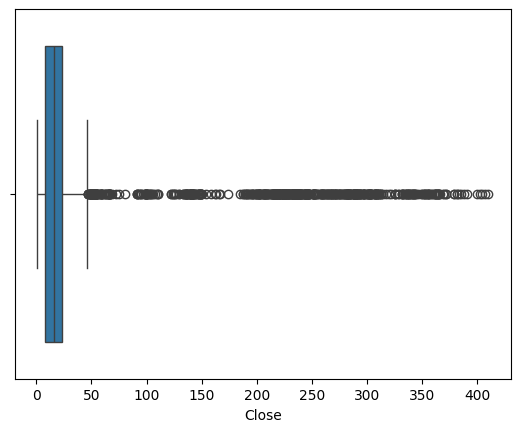

In [ ]:
sns.boxplot(x=df.Close)
plt.show()

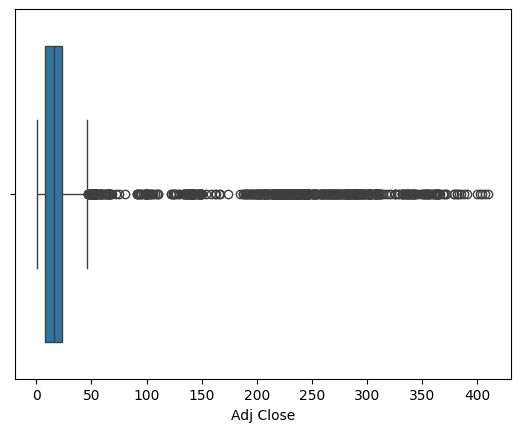

In [ ]:
sns.boxplot(x=df["Adj Close"])
plt.show()

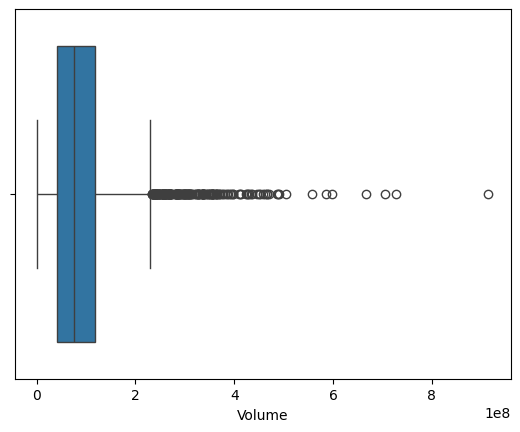

In [ ]:
sns.boxplot(x=df.Volume)
plt.show()

In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
1,2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
2,2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
3,2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500
4,2010-07-07,1.093333,1.108667,0.998667,1.053333,1.053333,103825500


In [ ]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
3072,2022-09-13,292.899994,297.399994,290.399994,292.130005,292.130005,68229600
3073,2022-09-14,292.239990,306.000000,291.640015,302.609985,302.609985,72628700
3074,2022-09-15,301.829987,309.119995,300.720001,303.750000,303.750000,64795500
3075,2022-09-16,299.609985,303.709991,295.600006,303.350006,303.350006,86949500
3076,2022-09-19,300.089996,309.839996,297.799988,309.070007,309.070007,60060200


Our data is of stock related so that consists of data of many years.From year to year stock may  increase or decrease so here we should treat them as outlier.Because thry may be the part of the real stocks.

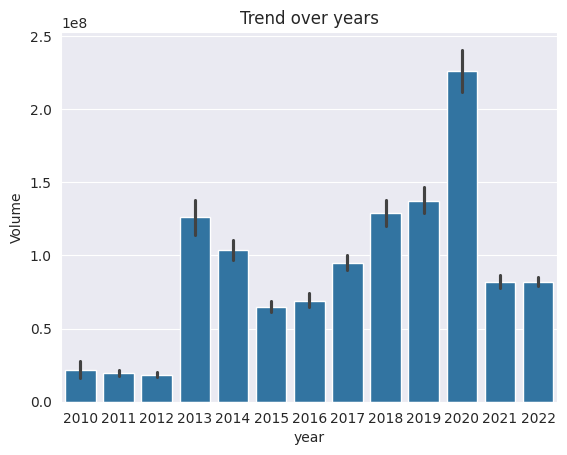

In [44]:
#observing trend of volume over years

sns.set_style("darkgrid")
sns.barplot(x=pd.DatetimeIndex(df.Date).year,y=df.Volume)
plt.title("Trend over years")
plt.xlabel("year")
plt.show()

we can see that in 2020 there was huge raise in volume of the stock.

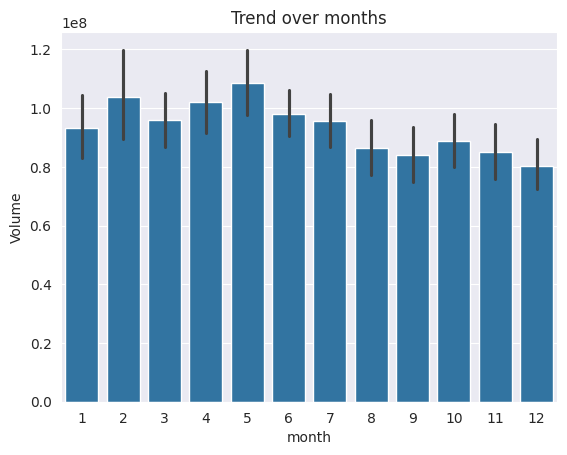

In [45]:
#trend of volume over months

sns.set_style("darkgrid")
sns.barplot(x=pd.DatetimeIndex(df.Date).month,y=df.Volume)
plt.title("Trend over months")
plt.xlabel("month")
plt.show()

May month has recorded huge volume of stock

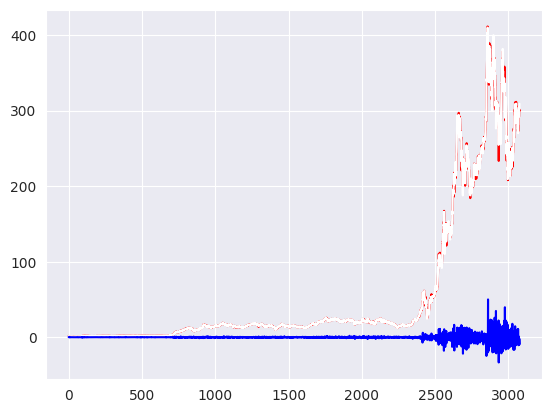

In [49]:
#plotting how profit varies with close and open prices

plt.plot(df.Open,"r")
plt.plot(df.Close,'w')
plt.plot(df.Profit,'b')
plt.show()

we can see that both close and open prices got overlapped and profit has some fluctuations with increase and decrease in open and close prices.

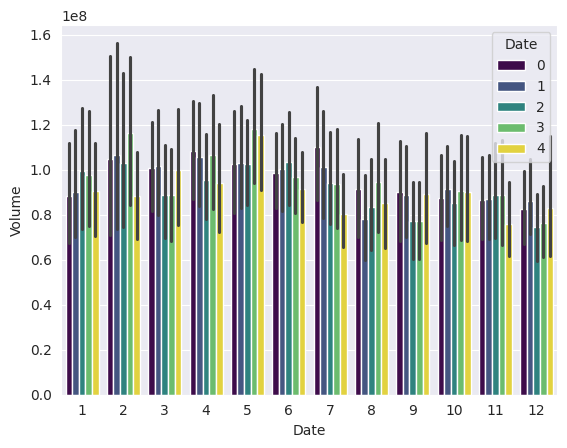

In [ ]:
#graph to represesnt month wise stock volumes along with particular day of the week

sns.barplot(x=pd.DatetimeIndex(df.Date).month,y=df.Volume,hue=pd.DatetimeIndex(df.Date).weekday,palette="viridis")
plt.show()

In [51]:
#calculating monthwise  highest price

month_high = df.groupby(pd.DatetimeIndex(df.Date).month)[['High']].max()
month_high

,High
Date,
1,402.666656
2,315.923340
3,371.589996
4,384.290009
5,318.500000
6,264.209991
7,298.320007
8,314.666656
9,309.839996


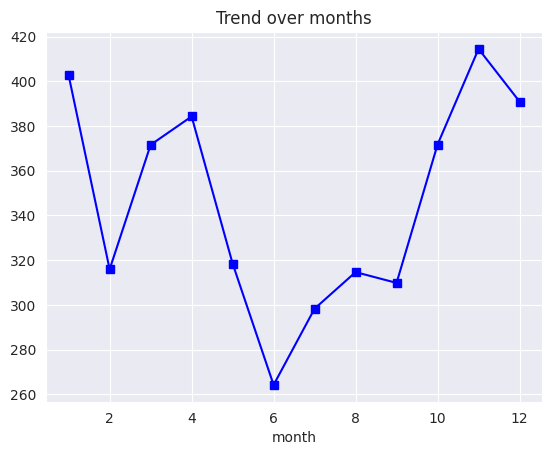

In [52]:
sns.set_style("darkgrid")
plt.plot(month_high, 's-b')
plt.title("Trend over months")
plt.xlabel("month")
plt.show()

In november month we can see there is highest price recorded i.e, $414

In [53]:
#calculating monthwise  lowest price

month_low = df.groupby(pd.DatetimeIndex(df.Date).month)[['Low']].min()
month_low

,Low
Date,
1,1.491333
2,1.407333
3,1.451333
4,1.613333
5,1.701333
6,1.553333
7,0.998667
8,1.159333
9,1.300000


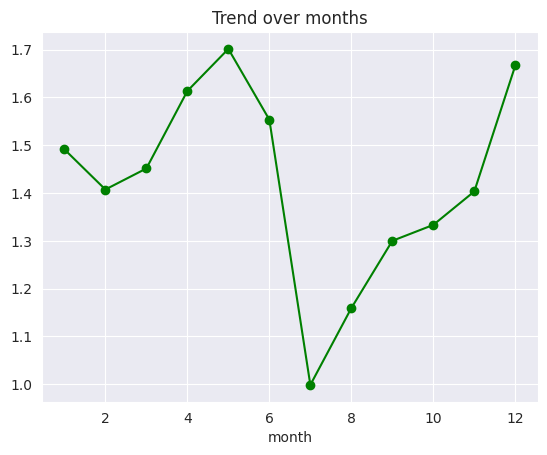

In [54]:
sns.set_style("darkgrid")
plt.plot(month_low, 'o-g')
plt.title("Trend over months")
plt.xlabel("month")
plt.show()

In july month we can see there is lowset price recorded i.e, $0.99

Text(0.5, 1.0, 'Profit')

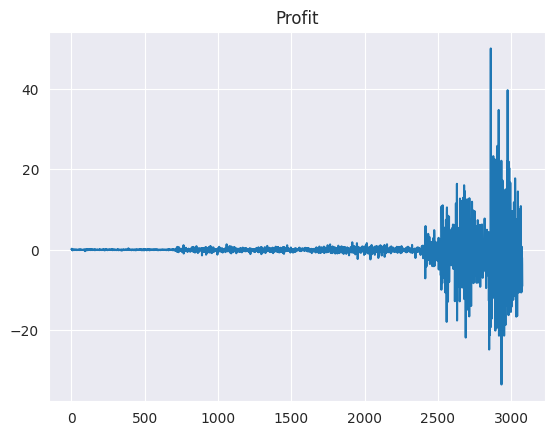

In [ ]:
#trend of prof

plt.plot(df.Open-df.Close)
plt.title("Profit")

In [20]:
representing the correlation between different attributes.

corr_matrix=df[num_col].corr()
corr_matrix

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.999732,0.999608,0.999224,0.999224,0.062706
High,0.999732,1.000000,0.999607,0.999646,0.999646,0.066253
Low,0.999608,0.999607,1.000000,0.999681,0.999681,0.059119
Close,0.999224,0.999646,0.999681,1.000000,1.000000,0.063432
Adj Close,0.999224,0.999646,0.999681,1.000000,1.000000,0.063432
Volume,0.062706,0.066253,0.059119,0.063432,0.063432,1.000000


we can see that almost all of the attributes are positively correlated.

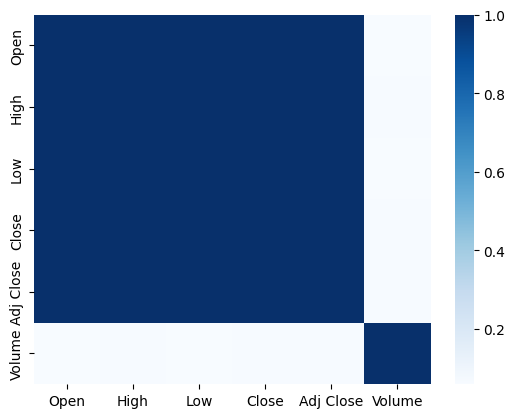

In [21]:
sns.heatmap(corr_matrix,fmt="d",cmap="Blues")
plt.show()

In [55]:
#calculating profit

df["Profit"] = df["Open"]-df["Close"]

In [24]:
df["Month"]=pd.DatetimeIndex(df.Date).month
df["Year"]=pd.DatetimeIndex(df.Date).year

In [27]:
#month wise profit

mon_profit = df.groupby("Month")[["Profit"]].sum()
mon_profit

,Profit
Month,
1,37.482085
2,12.263384
3,4.990689
4,88.175346
5,48.969291
6,-6.600687
7,-37.333966
8,6.781941
9,-57.461477


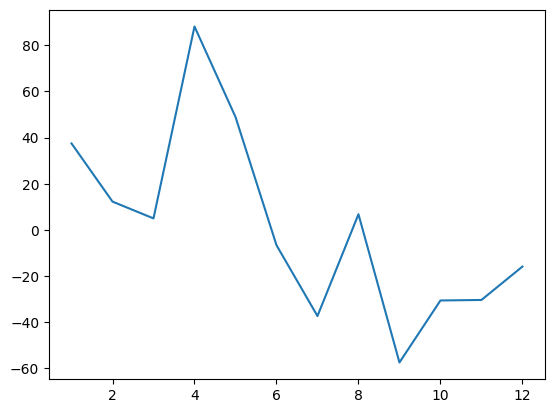

In [28]:
plt.plot(mon_profit)
plt.show()

In [30]:
#year wise profit

year_profit = df.groupby("Year")[["Profit"]].sum()
year_profit

,Profit
Year,
2010,0.899335
2011,0.289329
2012,0.575336
2013,0.255333
2014,1.450005
2015,-3.543981
2016,4.891991
2017,-0.335977
2018,-2.115993


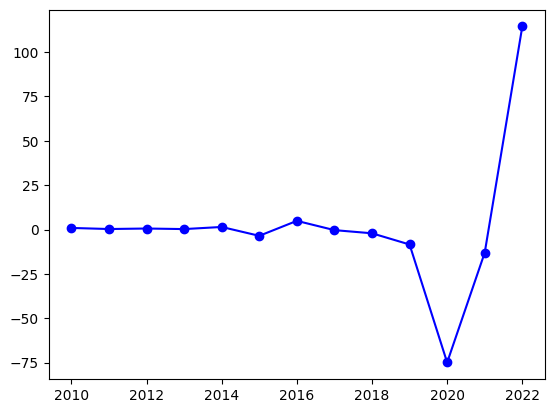

In [35]:
plt.plot(year_profit,"o-b")
plt.show()

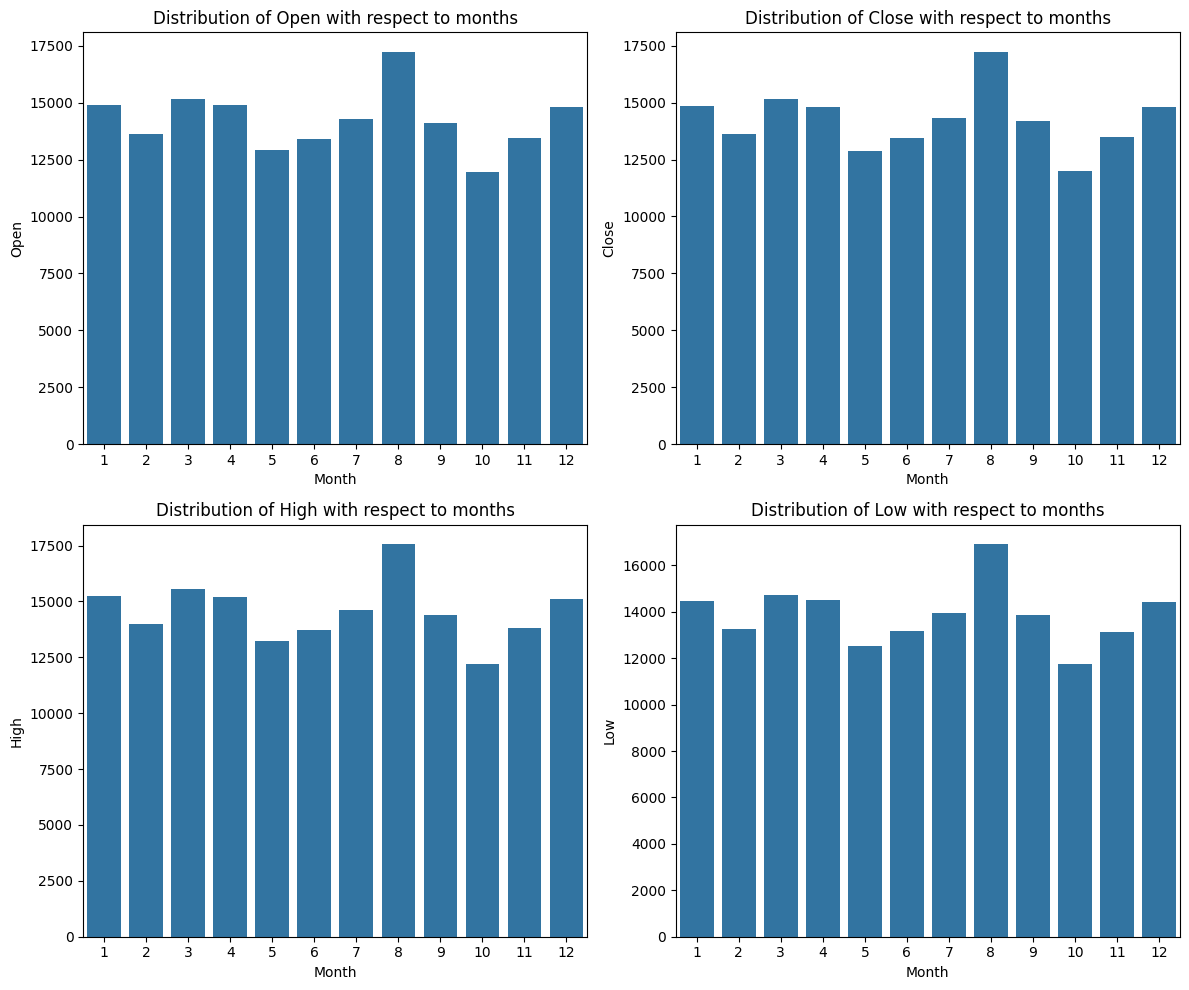

In [42]:
#distribution of various attributes with months.

col=["Open","Close","High","Low"]

fig,axes = plt.subplots(len(col)//2, 2,figsize=(12,10))
axes=axes.flatten()
for index, col in enumerate(col):
  sns.barplot(df.groupby('Month')[col].sum(),ax=axes[index])
  axes[index].set_title(f"Distribution of {col} with respect to months")
plt.tight_layout()
plt.show();